# 06. Groupby와 Pivot table(with타이타닉호 데이터)

groupby()는 데이터를 피봇팅하여 통계량을 볼 수 있도록 도와주는 메서드이면서, 데이터를 특정 조건에 맞게 전처리해 줄 때 용이합니다.

pivot_table()은 데이터를 특정 조건에 따라 행(row)과 열(column)을 기준으로 데이터를 펼쳐서 그에 대한 통계량을 볼 때 활용합니다.

### 모듈 import

In [3]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

### 데이터셋 로드

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


컬럼(columns) 설명

- survivied: 생존여부 (1: 생존, 0: 사망)

- pclass: 좌석 등급 (1등급, 2등급, 3등급)

- sex: 성별

- age: 나이

- sibsp: 형제 + 배우자 수

- parch: 부모 + 자녀 수

- fare: 좌석 요금

- embarked: 탑승 항구 (S, C, Q)

- class: pclass와 동일

- who: 남자(man), 여자(woman), 아이(child)

- adult_male: 성인 남자 여부

- deck: 데크 번호 (알파벳 + 숫자 혼용)

- embark_town: 탑승 항구 이름

- alive: 생존여부 (yes, no)

- alone: 혼자 탑승 여부

### apply() - 함수를 적용

apply()는 데이터 전처리시 굉장히 많이 활용하는 기능입니다.

좀 더 복잡한 logic을 컬럼 혹은 DataFrame에 적용하고자 할 때 사용합니다.

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


who 컬럼에 대하여 man은 남자, woman은 여자, child는 아이로 변경하고자 한다면 apply를 활용하여 해결할 수 있습니다.

In [6]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

### 함수(function) 정의

In [7]:
def transform_who(x):
    if x == 'man':
        return '남자'
    elif x == 'woman':
        return '여자'
    else:
        return '아이'

In [8]:
df['who'].apply(transform_who)

0      남자
1      여자
2      여자
3      여자
4      남자
       ..
886    남자
887    여자
888    여자
889    남자
890    남자
Name: who, Length: 891, dtype: object

분포를 확인하면 다음과 같습니다.

In [9]:
df['who'].apply(transform_who).value_counts()

who
남자    537
여자    271
아이     83
Name: count, dtype: int64

In [10]:
def transform_who(x):
    return x['fare'] / x['age']

In [11]:
df.apply(transform_who, axis=1)

0      0.329545
1      1.875876
2      0.304808
3      1.517143
4      0.230000
         ...   
886    0.481481
887    1.578947
888         NaN
889    1.153846
890    0.242188
Length: 891, dtype: float64

---

### apply() - lambda 함수

간단한 logic은 함수를 굳이 정의하지 않고, lambda 함수로 쉽게 해결할 수 있습니다.

In [12]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

0: 사망, 1: 생존 으로 변경하도록 하겠습니다.

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망')

0      사망
1      생존
2      생존
3      생존
4      사망
       ..
886    사망
887    생존
888    사망
889    생존
890    사망
Name: survived, Length: 891, dtype: object

In [15]:
df['survived'].apply(lambda x: '생존' if x == 1 else '사망').value_counts()

survived
사망    549
생존    342
Name: count, dtype: int64

---

## 1) Groupby()

데이터를 특정 기준으로 그룹핑할 때 활용합니다. 엑셀의 피봇테이블과 유사합니다.

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


타이타닉 호의 생존자와 사망자를 성별 기준으로 그룹핑하여 평균을 살펴보겠습니다.

In [18]:
df.groupby('sex').mean(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


groupby()를 사용할 때는 반드시 aggregate 하는 통계함수와 일반적으로 같이 적용합니다.

---

### 2개 이상의 컬럼으로 그룹

2개 이상의 컬럼으로 그룹핑할 때도 list로 묶어서 지정하면 됩니다.

In [20]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass']).mean(numeric_only=True)

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

### 1개의 특정 컬럼에 대한 결과 도출

우리의 주요 관심사는 survived 컬럼입니다. 만약 survived컬럼에 대한 결과만 도출하고 싶다면 컬럼을 맨 끝에 지정합니다.

In [21]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

예쁘게 출력하려면 pd.DataFrame()으로 감싸주거나, survived 컬럼을 []로 한 번 더 감싸주면 됩니다.

In [22]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [23]:
# DataFrame으로 출력
pd.DataFrame(df.groupby(['sex', 'pclass'])['survived'].mean())

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [24]:
# DataFrame으로 출력
df.groupby(['sex', 'pclass'])[['survived']].mean()

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

---

### reset_index(): 인덱스 초기화

reset_index(): 그룹핑된 데이터프레임의 index를 초기화하여 새로운 데이터프레임을 생성합니다.

In [25]:
# index 초기화
df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

,sex,pclass,survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


---

### 다중 컬럼에 대한 결과 도출

끝에 단일 컬럼이 아닌 여러 개의 컬럼을 지정합니다.

In [26]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].mean()

survived        age
sex    pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

---

### 다중 통계 함수 적용

여러 가지의 통계 값을 적용할 때는 agg()를 사용합니다.

In [27]:
# 성별, 좌석등급 별 통계
df.groupby(['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])

survived            age         
                   mean sum       mean      sum
sex    pclass                                  
female 1       0.968085  91  34.611765  2942.00
       2       0.921053  70  28.722973  2125.50
       3       0.500000  72  21.750000  2218.50
male   1       0.368852  45  41.281386  4169.42
       2       0.157407  17  30.740707  3043.33
       3       0.135447  47  26.507589  6706.42

---

## 연습문제

In [34]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
sample = df.copy()
sample.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
sample['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

sample 데이터프레임에 대하여 apply()를 활용하여 class 컬럼의 값을 다음과 같이 바꾸고, 분포를 출력후 변경 전과 동일한지 확인하세요

In [38]:
def covert(x):
    if x == "First":
        return "일등석"
    elif x == "Second":
        return "이등석"
    elif x == "Third":
        return "삼등석"
    
sample['class'].apply(covert).value_counts()

class
삼등석    491
일등석    216
이등석    184
Name: count, dtype: int64

---

In [53]:
sample = df.copy()
sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


groupby()를 활용하여 다음을 출력 하세요

pclass 별 생존율

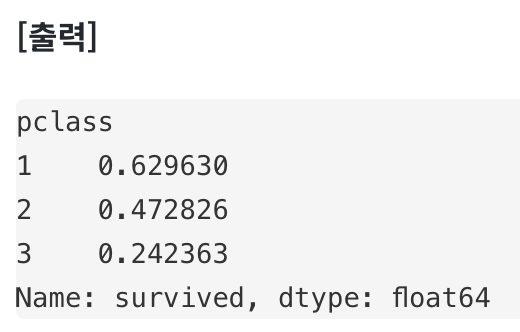

In [42]:
sample.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

embarked 별 생존율 통합 통계

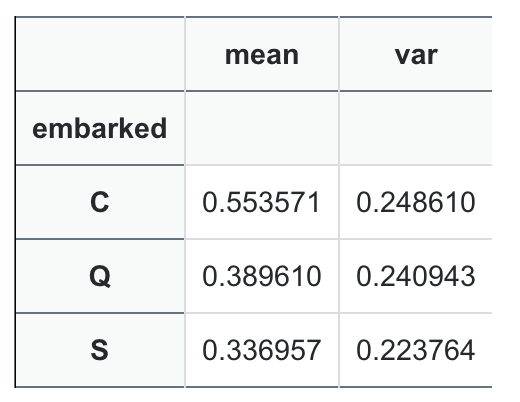

In [47]:
sample.groupby('embarked')['survived'].agg(['mean', 'var'])

,mean,var
embarked,,
C,0.553571,0.248610
Q,0.389610,0.240943
S,0.336957,0.223764


who, pclass별 생존율, 생존자수

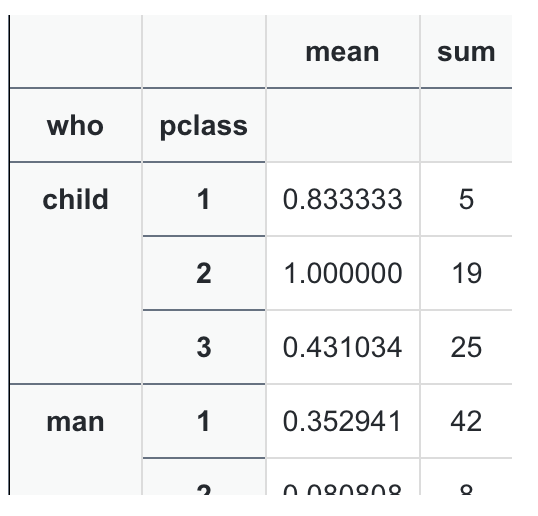

In [57]:
sample.groupby(['who', 'pclass'])['survived'].agg(['mean', 'sum'])

mean  sum
who   pclass               
child 1       0.833333    5
      2       1.000000   19
      3       0.431034   25
man   1       0.352941   42
      2       0.080808    8
      3       0.119122   38
woman 1       0.978022   89
      2       0.909091   60
      3       0.491228   56

- 남자의 나이는 남자 나이의 평균으로 채우세요

- 여자의 나이는 여자 나이의 평균으로 채우세요

```python
# 검증코드
print(sample['age'].isnull().sum())
print(f"age 평균: {sample['age'].mean():.2f}")
```

In [58]:
# 결측치 확인
print(sample['age'].isnull().sum())
print(f"age 평균: {sample['age'].mean():.2f}")

177
age 평균: 29.70


In [59]:
# sample['age'] = sample.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

sample['age'] = sample.groupby('sex')['age'].transform(lambda x: x.fillna(x.mean()))

In [60]:
# 검증코드
print(sample['age'].isnull().sum())
print(f"age 평균: {sample['age'].mean():.2f}")

0
age 평균: 29.74
